In [ ]:
#Nombre: Josue Alejandro Sauca Pucha
#Fecha: 22-04-2024

# Primer paso del ciclo de vida de datos
Como primer punto para el ciclo de vida de los datos se necesita la recopilacion de datos, esto se lo va a realizar al momento de recolectar todos los datos de diversas fuentes para tener una idea del panorama completo, es decir aqui se tiene una idea del contexto de lo que se va a hacer, en este caso
se recopilo informacion de una base da datos libre del ecuador y se va a
recopilar los datos de personas desaparecidas del año 2023

In [ ]:
import pandas as pd
import numpy as np

datos = pd.read_csv("./mdg_personasdesaparecidas_pm_2023_enero_marzo.csv",sep=';', encoding='latin-1')

In [ ]:
# Cargamos los datos del dataset seleccionado
# https://datosabiertos.gob.ec/dataset/personas-desaparecidas
datos

,Provincia,Latitud,Longitud,Edad Aprox.,Sexo,Motivo Desaparción,Motivo Desaparción Obs.,Fecha Desaparición,Situación Actual,Fecha Localización
0,PICHINCHA,"-0,2188216","-78,5135489",17,HOMBRE,NaN,NaN,24/1/2023,DESAPARECIDO,NaN
1,PICHINCHA,"-0,26909023","-78,54001523",17,MUJER,PROBLEMAS FAMILIARES,PROBLEMAS SENTIMENTALES,2/2/2023,ENCONTRADO,7/2/2023
2,SANTO DOMINGO DE LOS TSACHILAS,"0,0091672","-79,391605",39,HOMBRE,NaN,NaN,1/2/2023,DESAPARECIDO,NaN
3,PICHINCHA,"-0,17504166","-78,47478184",14,MUJER,PROBLEMAS SOCIALES,INFLUENCIA DE AMISTADES,16/3/2023,ENCONTRADO,17/3/2023
4,ESMERALDAS,"0,9873857","-79,65649069",28,HOMBRE,NaN,NaN,7/2/2023,DESAPARECIDO,NaN
...,...,...,...,...,...,...,...,...,...,...
1887,SANTO DOMINGO DE LOS TSACHILAS,"-0,2477616","-79,1485374",14,MUJER,NaN,NaN,31/1/2023,DESAPARECIDO,NaN
1888,AZUAY,"-3,38988084","-79,08271046",15,MUJER,NaN,NaN,30/1/2023,DESAPARECIDO,NaN
1889,CHIMBORAZO,"-1,908452","-78,641068",22,HOMBRE,PROBLEMAS SOCIALES,INFLUENCIA DE AMISTADES,23/1/2023,ENCONTRADO,14/4/2023
1890,GUAYAS,"-2,0721549","-79,9345141",32,HOMBRE,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,28/1/2023,ENCONTRADO,4/3/2023


In [ ]:
# Se va a cambiar la variabl de sexo para tomar realizar una correlacion
# de person con la variable edad, la cual tiene valores numericos
"""
'HOMBRE':1,
'MUJER':2

"""

datos['Sexo'] = datos['Sexo'].replace(
    {
        'HOMBRE':1,
        'MUJER':2
    }
)

In [ ]:
corr_pearson = datos["Edad Aprox."].corr(datos["Sexo"])
print("Coeficiente de correlación de Pearson:", corr_pearson)

Coeficiente de correlación de Pearson: -0.4017088708136676


In [ ]:
"""
Volvemos el dataset a la normalidad para seguir realizando
la practica

'HOMBRE':1,
'MUJER':2
"""

datos['Sexo'] = datos['Sexo'].replace(
    {
        1:'HOMBRE',
        2: 'MUJER'
    }
)

In [ ]:
#Contamos los datos nulos del dataset
datos.isnull().sum()

Provincia                    0
Latitud                      0
Longitud                     0
Edad Aprox.                  0
Sexo                         0
Motivo Desaparción         286
Motivo Desaparción Obs.    286
Fecha Desaparición           0
Situación Actual             0
Fecha Localización         286
dtype: int64

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provincia                1892 non-null   object
 1   Latitud                  1892 non-null   object
 2   Longitud                 1892 non-null   object
 3   Edad Aprox.              1892 non-null   int64 
 4   Sexo                     1892 non-null   object
 5   Motivo Desaparción       1606 non-null   object
 6   Motivo Desaparción Obs.  1606 non-null   object
 7   Fecha Desaparición       1892 non-null   object
 8   Situación Actual         1892 non-null   object
 9   Fecha Localización       1606 non-null   object
dtypes: int64(1), object(9)
memory usage: 147.9+ KB


In [ ]:
datos['Motivo S'].value_counts()

Motivo Desaparción
PROBLEMAS FAMILIARES             797
PROBLEMAS SOCIALES               534
FALLECIDO                         83
DISCAPACIDADES Y ENFERMEDADES     78
PROBLEMAS PSICOLÓGICOS            38
EXTRAVIADA                        38
PROBLEMA ECÓNOMICOS               13
PROBLEMAS ACADÉMICOS              12
FISCALÍA                           8
PERDIDO                            5
Name: count, dtype: int64

In [ ]:
datos['Motivo Desaparción'].mode()

0    PROBLEMAS FAMILIARES
Name: Motivo Desaparción, dtype: object

# Segundo paso del ciclo de vida de datos
Como segundo paso para la preparacion de datos se realiza la limpieza de datos,
transformacion y reestructuracion de datos que se va a utilizar, en el caso
que se esta presentando se va realizar un ingreso de datos en los valores nulos
que existen dentro del dataset con el fin de que se pueda trabajar en el mismo,
en el ejemplo se presenta un lleno a la columna Motivo Desaparcion.

In [ ]:
#Rellanamos la columna Motivo Desaparicion con la media de dicha columna, para
#realizar la limpieza de datos y lo aplicamos directamente al dataset guardado
datos['Motivo Desaparción'].fillna(datos['Motivo Desaparción'].mode()[0],inplace=True)

In [ ]:
#Observamos nuevamente el dataset luego de la limpieza de datos
"""
  Como se puede observar existe un sobree muestreo en la columna Motivo Desaparicion
  esto es algo que se lo va a corregir mas adelante mediante el uso de la tecnica SMOTENC
"""
datos['Motivo Desaparción'].value_counts()

Motivo Desaparción
PROBLEMAS FAMILIARES             1083
PROBLEMAS SOCIALES                534
FALLECIDO                          83
DISCAPACIDADES Y ENFERMEDADES      78
PROBLEMAS PSICOLÓGICOS             38
EXTRAVIADA                         38
PROBLEMA ECÓNOMICOS                13
PROBLEMAS ACADÉMICOS               12
FISCALÍA                            8
PERDIDO                             5
Name: count, dtype: int64

In [ ]:
#Como se puede observar dichas columnas ya se encuentra con los datos llenos
datos

,Provincia,Latitud,Longitud,Edad Aprox.,Sexo,Motivo Desaparción,Motivo Desaparción Obs.,Fecha Desaparición,Situación Actual,Fecha Localización
0,PICHINCHA,"-0,2188216","-78,5135489",17,HOMBRE,PROBLEMAS FAMILIARES,NaN,24/1/2023,DESAPARECIDO,NaN
1,PICHINCHA,"-0,26909023","-78,54001523",17,MUJER,PROBLEMAS FAMILIARES,PROBLEMAS SENTIMENTALES,2/2/2023,ENCONTRADO,7/2/2023
2,SANTO DOMINGO DE LOS TSACHILAS,"0,0091672","-79,391605",39,HOMBRE,PROBLEMAS FAMILIARES,NaN,1/2/2023,DESAPARECIDO,NaN
3,PICHINCHA,"-0,17504166","-78,47478184",14,MUJER,PROBLEMAS SOCIALES,INFLUENCIA DE AMISTADES,16/3/2023,ENCONTRADO,17/3/2023
4,ESMERALDAS,"0,9873857","-79,65649069",28,HOMBRE,PROBLEMAS FAMILIARES,NaN,7/2/2023,DESAPARECIDO,NaN
...,...,...,...,...,...,...,...,...,...,...
1887,SANTO DOMINGO DE LOS TSACHILAS,"-0,2477616","-79,1485374",14,MUJER,PROBLEMAS FAMILIARES,NaN,31/1/2023,DESAPARECIDO,NaN
1888,AZUAY,"-3,38988084","-79,08271046",15,MUJER,PROBLEMAS FAMILIARES,NaN,30/1/2023,DESAPARECIDO,NaN
1889,CHIMBORAZO,"-1,908452","-78,641068",22,HOMBRE,PROBLEMAS SOCIALES,INFLUENCIA DE AMISTADES,23/1/2023,ENCONTRADO,14/4/2023
1890,GUAYAS,"-2,0721549","-79,9345141",32,HOMBRE,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,28/1/2023,ENCONTRADO,4/3/2023


In [ ]:
"""Con la funcion describe se puede contar los valores de la clase de cada
  , tambien los valores unicos, asi como los valores que mas se repiten,
  el valor inicial asi como el valor final, pero en este caso como el dataset
  tiene valores de string no puede realizar algunos calculos debido a que no son
  numeros, por eso se debe cambiar estos valores con la finalidad de realizar
  calculos como la media, moda, mediana, etc.
"""
datos.describe(include='all')

,Provincia,Latitud,Longitud,Edad Aprox.,Sexo,Motivo Desaparción,Motivo Desaparción Obs.,Fecha Desaparición,Situación Actual,Fecha Localización
count,1892,1892,1892,1892.000000,1892,1892,1606,1892,1892,1606
unique,25,1565,1550,NaN,2,10,37,90,3,107
top,PICHINCHA,"-0,327644","-78,5673547",NaN,MUJER,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,17/2/2023,ENCONTRADO,5/2/2023
freq,466,8,8,NaN,1135,1083,470,32,1523,41
mean,NaN,NaN,NaN,23.283298,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,15.592852,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Lo que se va a realizar es cambiar los valores definidos dentro del dataset por numero, de tal manera que se
#pueda realizar el ejercicio ya que las cadenas no se puede trabajar, vamos a asiganar los valores
#de la siguiente manera entre un rango de 1 a 10, y de esa manera se va a poder realizar
#operaciones matematicas correspondientes

"""
'PROBLEMAS FAMILIARES':1,
'PROBLEMAS SOCIALES':2,
'PROBLEMAS PSICOLÓGICOS':3,
'DISCAPACIDADES Y ENFERMEDADES':4,
'EXTRAVIADA':5,
'PROBLEMA ECÓNOMICOS':6,
'FALLECIDO':7,
'PROBLEMAS ACADÉMICOS':8,
'PERDIDO':9,
'FISCALÍA':10
"""

datos['Motivo Desaparción'] = datos['Motivo Desaparción'].replace(
    {
        'PROBLEMAS FAMILIARES':1,
        'PROBLEMAS SOCIALES':2,
        'PROBLEMAS PSICOLÓGICOS':3,
        'DISCAPACIDADES Y ENFERMEDADES':4,
        'EXTRAVIADA':5,
        'PROBLEMA ECÓNOMICOS':6,
        'FALLECIDO':7,
        'PROBLEMAS ACADÉMICOS':8,
        'PERDIDO':9,
        'FISCALÍA':10
    }
)

In [ ]:
#Una vez hechos los cambios respectivos se procede
#a realizar los calculos pertinentes a la columna
#que se quiera trabajar

# Calcular estadísticos de la columna
media = datos['Motivo Desaparción'].mean()  # Media
desviacion_estandar = datos['Motivo Desaparción'].std()  # Desviación estándar
valor_maximo = datos['Motivo Desaparción'].max()  # Valor máximo
valor_minimo = datos['Motivo Desaparción'].min()  # Valor mínimo
mediana = datos['Motivo Desaparción'].median()  # Mediana
cuartil_25 = datos['Motivo Desaparción'].quantile(0.25)  # Cuartil 25
cuartil_75 = datos['Motivo Desaparción'].quantile(0.75)  # Cuartil 75

# Imprimir los resultados
print("Media:", media)
print("Desviación estándar:", desviacion_estandar)
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)
print("Mediana:", mediana)
print("Cuartil 25:", cuartil_25)
print("Cuartil 75:", cuartil_75)

Media: 1.9275898520084567
Desviación estándar: 1.6641743799422717
Valor máximo: 10
Valor mínimo: 1
Mediana: 1.0
Cuartil 25: 1.0
Cuartil 75: 2.0


* Como se puede observar se obtuvo que la media corresponde
con los problemas sociales.
* La mediana indica que es los problemas familiares.
* El valor maximo es Fiscalia
* El valor minimo es Problemas familiares
* El cuartil 25 es Problemas familiares
* El cuartil 75 es Problemas sociales

In [ ]:
"""
Aqui se va volver a los datos originales que tenia el dataset para poder
seguir con el ejercicio

'PROBLEMAS FAMILIARES':1,
'PROBLEMAS SOCIALES':2,
'PROBLEMAS PSICOLÓGICOS':3,
'DISCAPACIDADES Y ENFERMEDADES':4,
'EXTRAVIADA':5,
'PROBLEMA ECÓNOMICOS':6,
'FALLECIDO':7,
'PROBLEMAS ACADÉMICOS':8,
'PERDIDO':9,
'FISCALÍA':10

"""

datos['Motivo Desaparción'] = datos['Motivo Desaparción'].replace(
    {
        1:'PROBLEMAS FAMILIARES',
        2: 'PROBLEMAS SOCIALES',
        3: 'PROBLEMAS PSICOLÓGICOS',
        4: 'DISCAPACIDADES Y ENFERMEDADES',
        5: 'EXTRAVIADA',
        6: 'PROBLEMA ECÓNOMICOS',
        7:'FALLECIDO',
        8: 'PROBLEMAS ACADÉMICOS',
        9: 'PERDIDO',
        10: 'FISCALÍA'
    }
)

In [ ]:
#En este caso si los datos que incluye el dataset son letras,
#se puede usar el parametro 'O', ya que unicamente va a obtener
#valores como el numero de datos de una columna, cuantas veces
#se repite el dato mas frecuente, el primer dato y cuantos datos
#hay en dato unico en dicha columna
datos.describe(include=['O'])

,Provincia,Latitud,Longitud,Sexo,Motivo Desaparción,Motivo Desaparción Obs.,Fecha Desaparición,Situación Actual,Fecha Localización
count,1892,1892,1892,1892,1892,1606,1892,1892,1606
unique,25,1565,1550,2,10,37,90,3,107
top,PICHINCHA,"-0,327644","-78,5673547",MUJER,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,17/2/2023,ENCONTRADO,5/2/2023
freq,466,8,8,1135,1083,470,32,1523,41


# Tercer paso del ciclo de vida de datos

Luego de realizar la preparacion de datos se continua con la eleccion de datos
, para esto se va a eliminar las columnas que nos se requieran trabajar dentro
del ejemplo presentado, ya que existe una condicional que nos limita a trabajar
con una parte del dataset

In [ ]:
"""
  A continuacion se va a eliminar las siguientes columnas debido a que no se las va a
  tener en cuenta para el analisis en las siguientes ejecuciones.
"""
datos = datos.drop(columns=['Latitud', 'Longitud','Motivo Desaparción Obs.','Fecha Desaparición','Fecha Localización'])
datos

,Provincia,Edad Aprox.,Sexo,Motivo Desaparción,Situación Actual
0,PICHINCHA,17,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
1,PICHINCHA,17,MUJER,PROBLEMAS FAMILIARES,ENCONTRADO
2,SANTO DOMINGO DE LOS TSACHILAS,39,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
3,PICHINCHA,14,MUJER,PROBLEMAS SOCIALES,ENCONTRADO
4,ESMERALDAS,28,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
...,...,...,...,...,...
1887,SANTO DOMINGO DE LOS TSACHILAS,14,MUJER,PROBLEMAS FAMILIARES,DESAPARECIDO
1888,AZUAY,15,MUJER,PROBLEMAS FAMILIARES,DESAPARECIDO
1889,CHIMBORAZO,22,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
1890,GUAYAS,32,HOMBRE,PROBLEMAS FAMILIARES,ENCONTRADO


In [ ]:
#Se imprime la columna a utilizar
datos['Motivo Desaparción']

0       PROBLEMAS FAMILIARES
1       PROBLEMAS FAMILIARES
2       PROBLEMAS FAMILIARES
3         PROBLEMAS SOCIALES
4       PROBLEMAS FAMILIARES
                ...         
1887    PROBLEMAS FAMILIARES
1888    PROBLEMAS FAMILIARES
1889      PROBLEMAS SOCIALES
1890    PROBLEMAS FAMILIARES
1891      PROBLEMAS SOCIALES
Name: Motivo Desaparción, Length: 1892, dtype: object

In [ ]:
#Obtenemos los valores unicos de dicha columna
datos['Motivo Desaparción'].unique()

array(['PROBLEMAS FAMILIARES', 'PROBLEMAS SOCIALES',
       'PROBLEMAS PSICOLÓGICOS', 'DISCAPACIDADES Y ENFERMEDADES',
       'EXTRAVIADA', 'PROBLEMA ECÓNOMICOS', 'FALLECIDO',
       'PROBLEMAS ACADÉMICOS', 'PERDIDO', 'FISCALÍA'], dtype=object)

In [ ]:
"""
  A continuacion debemos asignar la variable dependiente e indenpediente
  en este caso del dataset que se va a utilizar
"""
X = datos
y = datos['Motivo Desaparción']

In [ ]:
y

0       PROBLEMAS FAMILIARES
1       PROBLEMAS FAMILIARES
2       PROBLEMAS FAMILIARES
3         PROBLEMAS SOCIALES
4       PROBLEMAS FAMILIARES
                ...         
1887    PROBLEMAS FAMILIARES
1888    PROBLEMAS FAMILIARES
1889      PROBLEMAS SOCIALES
1890    PROBLEMAS FAMILIARES
1891      PROBLEMAS SOCIALES
Name: Motivo Desaparción, Length: 1892, dtype: object

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# Resumen de la distribucion de clases
counter = Counter(y)
print(counter)

Counter({'PROBLEMAS FAMILIARES': 1083, 'PROBLEMAS SOCIALES': 534, 'FALLECIDO': 83, 'DISCAPACIDADES Y ENFERMEDADES': 78, 'PROBLEMAS PSICOLÓGICOS': 38, 'EXTRAVIADA': 38, 'PROBLEMA ECÓNOMICOS': 13, 'PROBLEMAS ACADÉMICOS': 12, 'FISCALÍA': 8, 'PERDIDO': 5})


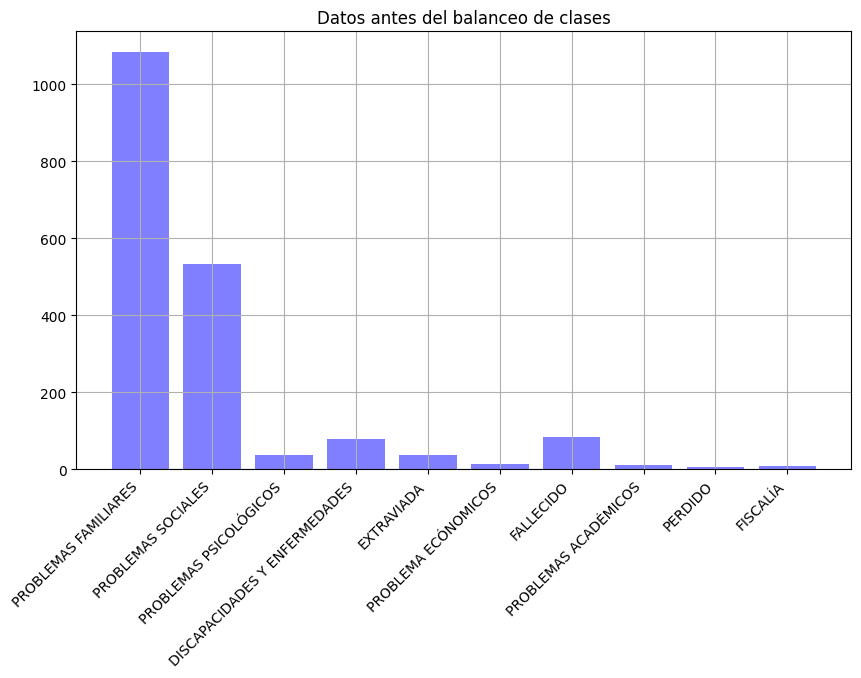

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(counter.keys(), counter.values(), color='blue', alpha=0.5)
plt.title('Datos antes del balanceo de clases')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.15)

plt.grid(True)
plt.show()

# Cuarto paso del ciclo de vida de datos
A continuacion se va a proceder a realizar el analisis de datos con la funcion SMOTENC que es:

    SMOTENC : a diferencia de SMOTE se envia las variables categorias, es decir solo las columnas que contienen valores en cadenas, no valores numericos

esta funcion se va a utilizar para un sobremuestreo nominal(variables categoricas)

In [ ]:
# Dentro del parametro categorical_features se le indica las variables que son categoricas,
# es decir las variables que no son numericas, y se le va a indicar el indice
# de la columna asi como se la especifica debajo.

"""
Provincia = 0
Edad Aprox. = 1
Sexo = 2
Motivo Desaparción = 3
Situación Actual = 4
"""

oversample = SMOTENC(categorical_features=[0,2,3,4],k_neighbors=4)
X, y = oversample.fit_resample(X, y)
# Se imprime las clases balanceadas
counter = Counter(y)
print(counter)

Counter({'PROBLEMAS FAMILIARES': 1083, 'PROBLEMAS SOCIALES': 1083, 'PROBLEMAS PSICOLÓGICOS': 1083, 'DISCAPACIDADES Y ENFERMEDADES': 1083, 'EXTRAVIADA': 1083, 'PROBLEMA ECÓNOMICOS': 1083, 'FALLECIDO': 1083, 'PROBLEMAS ACADÉMICOS': 1083, 'PERDIDO': 1083, 'FISCALÍA': 1083})


In [ ]:
counter.values()

dict_values([1083, 1083, 1083, 1083, 1083, 1083, 1083, 1083, 1083, 1083])

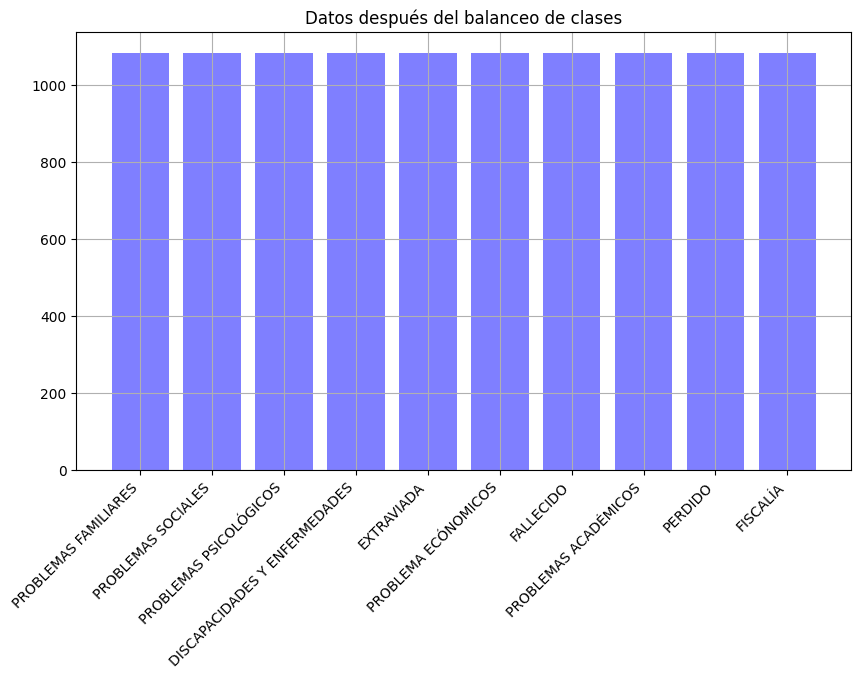

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Graficar los datos como gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(counter.keys(), counter.values(), color='blue', alpha=0.5)  # Gráfico de barras para visualizar los datos
plt.title('Datos después del balanceo de clases')

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.subplots_adjust(bottom=0.15)  # Ajustar la distancia entre las etiquetas del eje x y el gráfico

plt.grid(True)
plt.show()


In [ ]:
# Como se puede observar la variable x, ya se encuentra normalizada
# y tiene los datos originales ademas de los datos agregados
# mediante el metodo smotenc
X

,Provincia,Edad Aprox.,Sexo,Motivo Desaparción,Situación Actual
0,PICHINCHA,17,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
1,PICHINCHA,17,MUJER,PROBLEMAS FAMILIARES,ENCONTRADO
2,SANTO DOMINGO DE LOS TSACHILAS,39,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
3,PICHINCHA,14,MUJER,PROBLEMAS SOCIALES,ENCONTRADO
4,ESMERALDAS,28,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
...,...,...,...,...,...
10825,PICHINCHA,14,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
10826,GUAYAS,28,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
10827,PICHINCHA,17,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
10828,PICHINCHA,3,MUJER,PROBLEMAS SOCIALES,ENCONTRADO


In [ ]:
# La variable y de igual manera se encuentra ya normalizada, mediante el
# metodo smotenc el cual iguala a todas las clases de dicha columna
# y las deja igual
y

0        PROBLEMAS FAMILIARES
1        PROBLEMAS FAMILIARES
2        PROBLEMAS FAMILIARES
3          PROBLEMAS SOCIALES
4        PROBLEMAS FAMILIARES
                 ...         
10825      PROBLEMAS SOCIALES
10826      PROBLEMAS SOCIALES
10827      PROBLEMAS SOCIALES
10828      PROBLEMAS SOCIALES
10829      PROBLEMAS SOCIALES
Name: Motivo Desaparción, Length: 10830, dtype: object

In [ ]:
#Se realiza una copia de los datos obtenidos
data_aux = X
data_aux

,Provincia,Edad Aprox.,Sexo,Motivo Desaparción,Situación Actual
0,PICHINCHA,17,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
1,PICHINCHA,17,MUJER,PROBLEMAS FAMILIARES,ENCONTRADO
2,SANTO DOMINGO DE LOS TSACHILAS,39,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
3,PICHINCHA,14,MUJER,PROBLEMAS SOCIALES,ENCONTRADO
4,ESMERALDAS,28,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
...,...,...,...,...,...
10825,PICHINCHA,14,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
10826,GUAYAS,28,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
10827,PICHINCHA,17,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
10828,PICHINCHA,3,MUJER,PROBLEMAS SOCIALES,ENCONTRADO


In [ ]:
#Contamos los datos nulos del dataset
data_aux.isnull().sum()

Provincia             0
Edad Aprox.           0
Sexo                  0
Motivo Desaparción    0
Situación Actual      0
dtype: int64

In [ ]:
data_aux.value_counts()

Provincia           Edad Aprox.  Sexo    Motivo Desaparción    Situación Actual
PICHINCHA           15           MUJER   PROBLEMAS ACADÉMICOS  ENCONTRADO          188
GUAYAS              9            HOMBRE  PERDIDO               ENCONTRADO          175
PICHINCHA           16           MUJER   PROBLEMAS ACADÉMICOS  ENCONTRADO          121
                    14           MUJER   PROBLEMAS ACADÉMICOS  ENCONTRADO          101
GUAYAS              10           HOMBRE  PERDIDO               ENCONTRADO           92
                                                                                  ... 
IMBABURA            49           HOMBRE  PROBLEMAS SOCIALES    ENCONTRADO            1
                    45           MUJER   PROBLEMAS SOCIALES    ENCONTRADO            1
                                 HOMBRE  PROBLEMAS SOCIALES    ENCONTRADO            1
                    41           MUJER   PROBLEMA ECÓNOMICOS   ENCONTRADO            1
ZONA NO DELIMITADA  23           MUJER   PROBLEMAS

# Quinto paso del ciclo de vida de datos
A continuacion se va a proceder a realizar la presentacion de datos obtenido luego de aplicar los métodos pertinentes
esto se lo va a hacer presentando la nueva data en un archivo llamado mdg_personasdesaparecidas_pm_2023_enero_marzo_nuevo.csv

In [ ]:
#Almacenamos el nuevo dataset generado
#luego de la normalizacion
data_aux.to_csv('mdg_personasdesaparecidas_pm_2023_enero_marzo_nuevo.csv')

In [ ]:
#Mostrara las 10 filas del nuevo archivo creado
!head -n 50 SaucaJosue.csv

,Provincia,Edad Aprox.,Sexo,Motivo Desaparción,Situación Actual
0,PICHINCHA,17,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
1,PICHINCHA,17,MUJER,PROBLEMAS FAMILIARES,ENCONTRADO
2,SANTO DOMINGO DE LOS TSACHILAS,39,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
3,PICHINCHA,14,MUJER,PROBLEMAS SOCIALES,ENCONTRADO
4,ESMERALDAS,28,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
5,SANTO DOMINGO DE LOS TSACHILAS,42,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
6,GUAYAS,16,MUJER,PROBLEMAS FAMILIARES,ENCONTRADO
7,GUAYAS,28,HOMBRE,PROBLEMAS FAMILIARES,DESAPARECIDO
8,CHIMBORAZO,12,HOMBRE,PROBLEMAS FAMILIARES,ENCONTRADO
9,GUAYAS,2,MUJER,PROBLEMAS FAMILIARES,DESAPARECIDO
10,PICHINCHA,16,MUJER,PROBLEMAS FAMILIARES,DESAPARECIDO
11,IMBABURA,23,HOMBRE,PROBLEMAS SOCIALES,ENCONTRADO
12,GUAYAS,21,MUJER,PROBLEMAS PSICOLÓGICOS,ENCONTRADO
13,MANABI,17,MUJER,PROBLEMAS FAMILIARES,ENCONTRADO
14,MANABI,2,HOMBRE,PROBLEMAS FAMILIARES,ENCONTRADO
15,AZUAY,1,MUJER,PROBLEMAS FAMILIARES,ENCONTRADO
16,MANABI,15,MUJER,PROBLEMAS FAMILIARES,ENCO